# Netflix Recommendation System

In [44]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading in the Dataset
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Exploratory Data Analysis

In [4]:
# Count of Null values in every column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
# Replacing all Null values with 'Na' 
df = df.fillna('Na')

In [6]:
# Helper function to extract genres and cast from the colum "listed_in" and "cast" respectively
# As a movie or show can have multiple genres and cast members we will make seperate dataframe for both of them

def convert_to_series(dataframe, y):
    genres = []
    for row in dataframe[y]:
        row_modified = row.split(",")
        for genre in row_modified:
            genres.append(genre)
            
    genres_df = pd.DataFrame(genres)
    return genres_df

# Contains all the Genres from all the movies and shows
genres= convert_to_series(df, "listed_in")

# Contains all the Cast Members names from all the movies and shows
cast = convert_to_series(df, "cast")

## Ploting the Top 10 Genres from this dataset 

<AxesSubplot:>

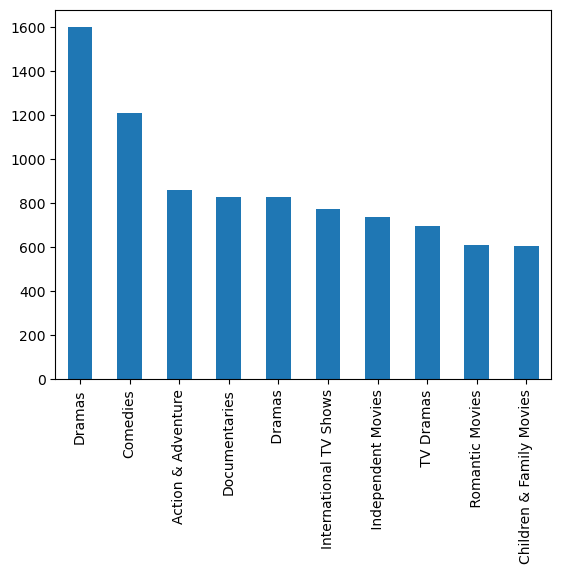

In [45]:
genres[0].value_counts().head(11)[1:].plot.bar()

In [8]:
cast = cast[cast[0] !='Na']
cast.reset_index(drop=True)

,0
0,Ama Qamata
1,Khosi Ngema
2,Gail Mabalane
3,Thabang Molaba
4,Dillon Windvogel
...,...
64121,Manish Chaudhary
64122,Meghna Malik
64123,Malkeet Rauni
64124,Anita Shabdish


## Ploting the Top 10 Cast Members with most movies or shows

<AxesSubplot:xlabel='0'>

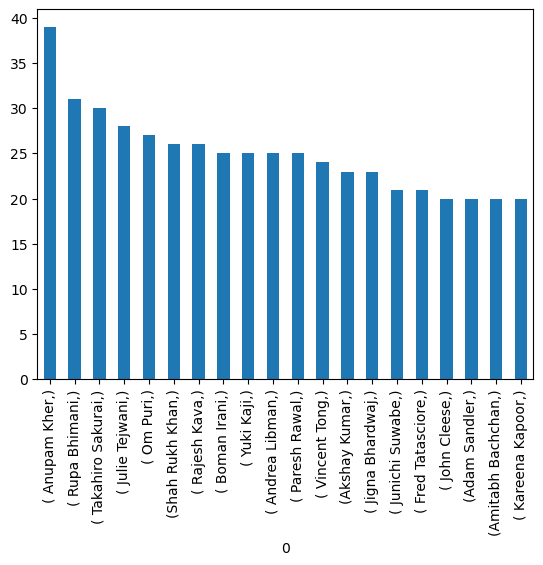

In [9]:
cast.value_counts().head(20).plot.bar()

## Ploting the Top 10 Directors with most movies or shows

<AxesSubplot:>

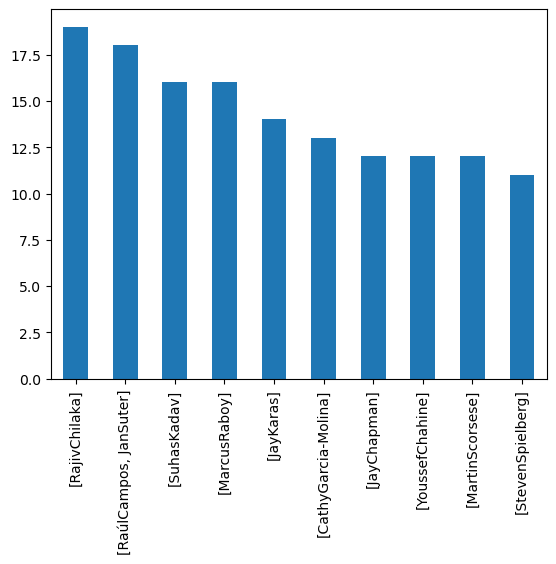

In [46]:
df['director'].value_counts().head(11)[1:].plot.bar()

## Ploting the Movies or Shows with particular Age Restriction

<AxesSubplot:>

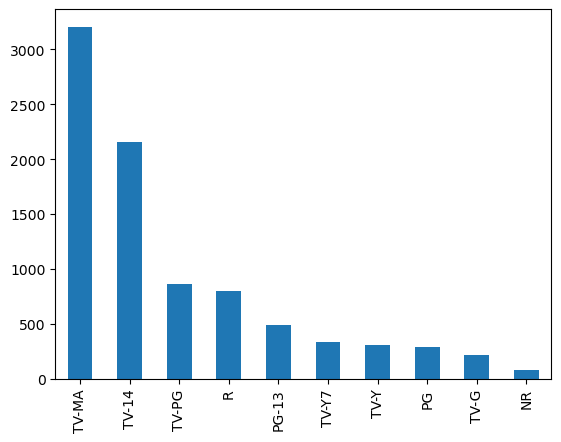

In [12]:
df['rating'].value_counts().head(10).plot.bar()

## Count of movies and shows in the data set

<AxesSubplot:ylabel='type'>

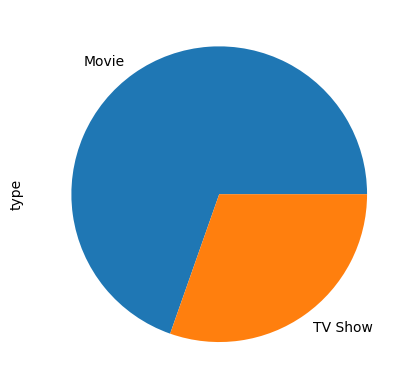

In [13]:
df['type'].value_counts().plot.pie()

## Top Countries where most Netflix Movies or shows are produced 

<AxesSubplot:ylabel='country'>

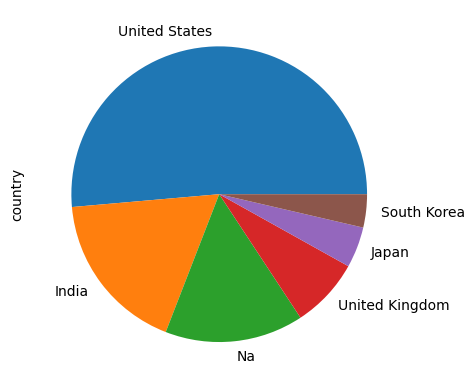

In [17]:
df['country'].value_counts().head(6).plot.pie()

# Recommendation System 

In [18]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [19]:
df = df[['show_id', 'type', 'title', 'director', 'cast',
       'release_year', 'listed_in', 'description']]

In [20]:
def Convert(string):
    l1 = []
    for i in string:
        li = list(i.split(","))
        l1.append(li)
    return l1

In [21]:
df['director'] = (Convert(df['director']))
df['cast'] = (Convert(df['cast']))
df['listed_in'] = (Convert(df['listed_in']))

In [22]:
df['description'] = df['description'].apply(lambda x:x.split())

In [23]:
df.head()

,show_id,type,title,director,cast,release_year,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Na],2020,[Documentaries],"[As, her, father, nears, the, end, of, his, li..."
1,s2,TV Show,Blood & Water,[Na],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",2021,"[International TV Shows, TV Dramas, TV Myste...","[After, crossing, paths, at, a, party,, a, Cap..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",2021,"[Crime TV Shows, International TV Shows, TV ...","[To, protect, his, family, from, a, powerful, ..."
3,s4,TV Show,Jailbirds New Orleans,[Na],[Na],2021,"[Docuseries, Reality TV]","[Feuds,, flirtations, and, toilet, talk, go, d..."
4,s5,TV Show,Kota Factory,[Na],"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",2021,"[International TV Shows, Romantic TV Shows, ...","[In, a, city, of, coaching, centers, known, to..."


In [24]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [25]:
df['director'] = df['director'].apply(collapse)
df['cast'] = df['cast'].apply(collapse)

In [26]:
df.head()

,show_id,type,title,director,cast,release_year,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[KirstenJohnson],[Na],2020,[Documentaries],"[As, her, father, nears, the, end, of, his, li..."
1,s2,TV Show,Blood & Water,[Na],"[AmaQamata, KhosiNgema, GailMabalane, ThabangM...",2021,"[International TV Shows, TV Dramas, TV Myste...","[After, crossing, paths, at, a, party,, a, Cap..."
2,s3,TV Show,Ganglands,[JulienLeclercq],"[SamiBouajila, TracyGotoas, SamuelJouy, Nabiha...",2021,"[Crime TV Shows, International TV Shows, TV ...","[To, protect, his, family, from, a, powerful, ..."
3,s4,TV Show,Jailbirds New Orleans,[Na],[Na],2021,"[Docuseries, Reality TV]","[Feuds,, flirtations, and, toilet, talk, go, d..."
4,s5,TV Show,Kota Factory,[Na],"[MayurMore, JitendraKumar, RanjanRaj, AlamKhan...",2021,"[International TV Shows, Romantic TV Shows, ...","[In, a, city, of, coaching, centers, known, to..."


In [27]:
df['tags'] = df['director'] + df['cast'] + df['listed_in'] + df['description']

In [28]:
new_df = df[['show_id', 'type', 'title', 'release_year', 'tags']]

In [29]:
new_df.head()

,show_id,type,title,release_year,tags
0,s1,Movie,Dick Johnson Is Dead,2020,"[KirstenJohnson, Na, Documentaries, As, her, f..."
1,s2,TV Show,Blood & Water,2021,"[Na, AmaQamata, KhosiNgema, GailMabalane, Thab..."
2,s3,TV Show,Ganglands,2021,"[JulienLeclercq, SamiBouajila, TracyGotoas, Sa..."
3,s4,TV Show,Jailbirds New Orleans,2021,"[Na, Na, Docuseries, Reality TV, Feuds,, flir..."
4,s5,TV Show,Kota Factory,2021,"[Na, MayurMore, JitendraKumar, RanjanRaj, Alam..."


In [30]:
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))

C:\Users\suraj\AppData\Local\Temp\ipykernel_4656\1824047427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))


In [31]:
new_df['tags'] = new_df['tags'].apply(lambda x: x.lower())

C:\Users\suraj\AppData\Local\Temp\ipykernel_4656\1380776331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: x.lower())


In [32]:
new_df.head()

,show_id,type,title,release_year,tags
0,s1,Movie,Dick Johnson Is Dead,2020,kirstenjohnson na documentaries as her father ...
1,s2,TV Show,Blood & Water,2021,na amaqamata khosingema gailmabalane thabangmo...
2,s3,TV Show,Ganglands,2021,julienleclercq samibouajila tracygotoas samuel...
3,s4,TV Show,Jailbirds New Orleans,2021,"na na docuseries reality tv feuds, flirtation..."
4,s5,TV Show,Kota Factory,2021,na mayurmore jitendrakumar ranjanraj alamkhan ...


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [34]:
vector = cv.fit_transform(new_df['tags']).toarray()

In [35]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [36]:
def stem (text):
    y =[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [37]:
new_df['tags'] = new_df['tags'].apply(stem)

C:\Users\suraj\AppData\Local\Temp\ipykernel_4656\3213734980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


In [38]:
vector = cv.fit_transform(new_df['tags']).toarray()


In [39]:
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
similarity = cosine_similarity(vector)

In [41]:
similarity.shape

(8807, 8807)

In [42]:
def recommend(movie):
    index = new_df[new_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[0:6]:
        print(new_df.iloc[i[0]]['title'], new_df.iloc[i[0]]['release_year'])


In [43]:
recommend("Friends")

Friends 2003
Why Are You Like This 2021
Dad's Army 1977
Workin' Moms 2021
Little Things 2019
La Rosa de Guadalupe 2010
